<center><h1>The Perceptron</h1></center>


# 1. Introduction

## What is the Perceptron?
The Perceptron is one of the earliest types of artificial neural networks and serves as a fundamental building block for modern deep learning. Introduced by **Frank Rosenblatt** in 1958, the Perceptron is a type of supervised learning algorithm used for binary classification problems.




![Perceptron Model](ThePerceptron.webp)


# 2. How Does the Perceptron Work?
A Perceptron consists of the following components:
- **Inputs** $( x_{1}, x_{2},..., x_{n} )$: These are the features of the input data.
- **Weights** $( w_{1}, w_{2},..., w_{n} )$: Each input has an associated weight that represents its importance.
- **Bias** $(b)$: An additional parameter that helps adjust the decision boundary.
- **Activation Function**: A function that determines whether the neuron fires (outputs 1) or not (outputs 0).
---


### **Mathematical Representation**
The Perceptron makes predictions using the following formula:

$$
y = f\left(\sum_{i=1}^{n} w_i x_i + b\right)
$$

where:
- **Inputs** $( x_1, x_2, ..., x_n )$: These are the input features,
- **Weights** $( w_1, w_2, ..., w_n )$: Each input has an associated weight that represents its importance,
- **Bias** $( b )$: An additional parameter that helps adjust the decision boundary,
- **Activation Function**: A function that determines whether the neuron fires (outputs 1) or not (outputs 0), usually a **step function**:

$$
f(z) =
\begin{cases}
1, & \text{if } z \geq 0 \\
0, & \text{otherwise}
\end{cases}
$$

This means that if the weighted sum is greater than or equal to zero, the Perceptron outputs **1**, otherwise it outputs **0**.

---

## Perceptron Learning Algorithm
The Perceptron algorithm is trained using a supervised learning process, meaning it requires labeled data. The training process follows these steps:

### **Step 1: Initialize Parameters**
- Set the weights $( w_1, w_2, ..., w_n )$ and bias $( b )$ to small random values or zeros.
- Choose a **learning rate** $( \eta )$, which controls how much the weights are adjusted during training.

### **Step 2: Iterate Over the Training Data**
For each training example $( x_i, y_i )$:
1. Compute the weighted sum:
   $$
   z = \sum w_i x_i + b
   $$
2. Apply the activation function to determine the output $( \hat{y} )$:
   $$
   \hat{y} = f(z)
   $$
3. Compare the predicted output $( \hat{y} )$ with the actual label $( y )$.
4. If the prediction is incorrect, update the weights and bias:
   $$
   w_i = w_i + \eta (y - \hat{y}) x_i
   $$
   $$
   b = b + \eta (y - \hat{y})
   $$
5. Repeat until all examples are correctly classified or a stopping criterion is met (e.g., a maximum number of iterations).
---

# 3. About the Heart Disease Dataset

### Context
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued:
- 0 = no disease
- 1 = disease

### Content
#### Attribute Information:
- **age**: Age of the patient
- **sex**: Gender of the patient
- **chest pain type**: 4 types of chest pain (values 1, 2, 3, 4)
- **resting blood pressure**: Resting blood pressure (in mm Hg)
- **serum cholesterol in mg/dl**: Serum cholesterol levels
- **fasting blood sugar > 120 mg/dl**: 1 if blood sugar is greater than 120 mg/dl, 0 otherwise
- **resting electrocardiographic results**: Values 0, 1, 2 for different electrocardiographic results
- **maximum heart rate achieved**: Maximum heart rate achieved during exercise
- **exercise induced angina**: 1 if the patient has exercise-induced angina, 0 otherwise
- **oldpeak**: ST depression induced by exercise relative to rest
- **the slope of the peak exercise ST segment**: Type of slope during peak exercise
- **number of major vessels (0-3) colored by fluoroscopy**: Number of vessels visible on fluoroscopy
- **thal**:
  - 0 = normal
  - 1 = fixed defect
  - 2 = reversible defect

The names and social security numbers of the patients were recently removed from the database and replaced with dummy values.

---


# 4. Steps to Apply Perceptron Algorithm to Heart Disease Dataset

### 1. Load and Preprocess Data
First, we need to import the necessary libraries and load the dataset. We will use the `pandas` library to load the `heart.csv` file and preprocess the data.


In [6]:
# If you're using a Jupyter Notebook
!pip install scikit-learn

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = "heart.csv"  # Update with your dataset's path
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### 2. Data Preprocessing

The Perceptron algorithm requires numeric input features. In this step, we will encode the categorical features (e.g., `chest pain type`, `thal`) and handle any missing values, if necessary. Afterward, we will split the dataset into training and testing sets.

#### Encoding Categorical Variables
We will convert categorical variables into numeric values using **one-hot encoding** (or **label encoding** depending on the feature). This is essential because the Perceptron model can only handle numerical inputs.

#### Handling Missing Values
We will check for any missing values in the dataset and handle them accordingly (e.g., by removing or filling them).

#### Splitting the Dataset
After preprocessing the data, we will split the dataset into **training** and **testing** sets. We will use 80% of the data for training and 20% for testing.


In [26]:
# Check column names and data types
print(df.dtypes)

# Check for missing values
print(df.isnull().sum())

# Fill missing values with column mean (if any)
df.fillna(df.mean(), inplace=True)

# Check column names again to ensure the categorical columns exist
print(df.columns)

# Encoding categorical variables using one-hot encoding
# Update the column names based on the dataset
df = pd.get_dummies(df, columns=["cp", "thal"], drop_first=True)

# Separate features (X) and target (y)
X = df.drop('target', axis=1)  # 'target' is the label column
y = df['target']

# Split the dataset into training and testing sets (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


### 3. Define the Perceptron Algorithm

Next, we will implement the **Perceptron algorithm** from scratch. The algorithm adjusts the weights based on the prediction error, making it a simple but effective method for binary classification tasks.

#### Perceptron Algorithm Steps:
1. Initialize the weights and bias.
2. For each training example, calculate the predicted output.
3. Update the weights and bias if the prediction is incorrect.
4. Repeat the process until convergence or a specified number of iterations.

In [28]:
import numpy as np

class Perceptron:
    def __init__(self, learning_rate=0.1, max_iter=1000):
        # Initialize the learning rate and maximum number of iterations
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Initialize weights and bias
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features)  # Set weights to zero
        self.bias = 0  # Set bias to zero

        # Loop through each iteration
        for _ in range(self.max_iter):
            # Track if there is any update in the weights
            updated = False

            # Loop through each training example
            for i in range(num_samples):
                # Calculate the model's prediction (step function)
                linear_output = np.dot(X[i], self.weights) + self.bias
                prediction = 1 if linear_output >= 0 else 0

                # Check if prediction is incorrect
                if prediction != y[i]:
                    # Update the weights and bias
                    update_factor = self.learning_rate * (y[i] - prediction)
                    self.weights += update_factor * X[i]
                    self.bias += update_factor
                    updated = True

            # If no update was made, stop the algorithm (convergence)
            if not updated:
                break

    def predict(self, X):
        # Calculate the predicted output for each sample
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)


### 4. Train the Perceptron Model

Now, we can create an instance of the **Perceptron** model, train it on the **training data**, and make predictions on the **test data**.

#### Steps:
1. Prepare the features (X) and target (y).
2. Split the dataset into training and testing sets (80% train, 20% test).
3. Create an instance of the Perceptron class.
4. Train the model on the training set.
5. Make predictions on the test set and calculate accuracy.

In [32]:
# Step 1: Prepare the features (X) and target (y)
X = df.drop('target', axis=1).values  # Features (convert to numpy array)
y = df['target'].values  # Target (convert to numpy array)

# Step 2: Ensure all features are numeric (convert if necessary)
X = X.astype(float)  # Convert all values in X to float

# Step 3: Handle any missing values in X or y (if any)
# For example, filling missing values with the mean
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Step 4: Manually split the dataset (80% train, 20% test)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Step 5: Create an instance of the Perceptron class
perceptron = Perceptron(learning_rate=0.1, max_iter=1000)

# Step 6: Train the Perceptron model on the training data
perceptron.fit(X_train, y_train)

# Step 7: Make predictions on the test data
y_pred = perceptron.predict(X_test)

# Step 8: Calculate accuracy (simple comparison)
accuracy = (y_pred == y_test).mean()

# Display the result
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 81.95%


The result of **accuracy = 81.95%** means that the **Perceptron model** correctly predicted the target value (whether the individual has heart disease or not) for **81.95%** of the test data instances.

#### Interpretation:
- **Accuracy** is a measure of how well the model's predictions match the actual values in the dataset.
- An accuracy of **81.95%** indicates that, out of all the predictions made on the test set, about **82%** were correct.
- This is a reasonable performance, especially considering that the Perceptron algorithm is a simple linear classifier.

#### Conclusion:
Overall, an accuracy of **81.95%** is a solid result for this dataset, but it may be worth experimenting with more advanced algorithms to improve it further.



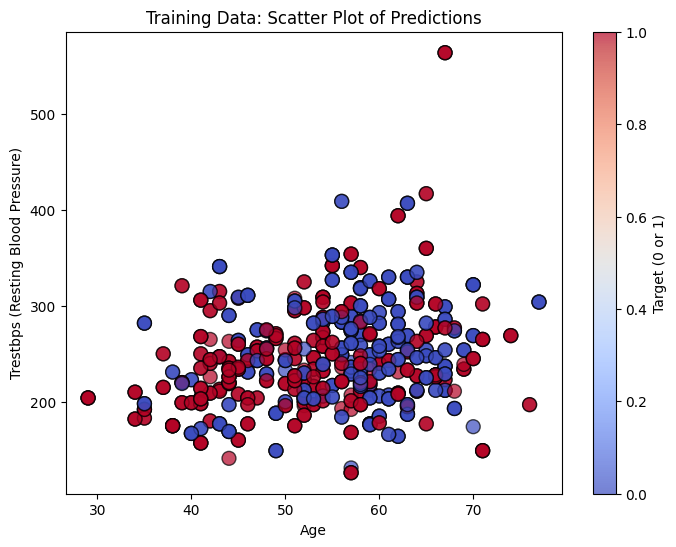

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Choose two features for the scatter plot
# For example, let's use 'age' (feature 0) and 'trestbps' (feature 3)
# You can adjust the feature indices based on the dataset's column order.
X_train_2d = X_train[:, [0, 3]]  # 'age' and 'trestbps'

# Step 2: Create the scatter plot for the training data
plt.figure(figsize=(8, 6))

# Plot the training data with color coding based on the predicted labels
scatter = plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, cmap='coolwarm', marker='o', edgecolor='k', s=100, alpha=0.7)

# Adding labels and title
plt.title("Training Data: Scatter Plot of Predictions")
plt.xlabel('Age')
plt.ylabel('Trestbps (Resting Blood Pressure)')

# Show the color bar with labels
plt.colorbar(scatter, label='Target (0 or 1)')

# Show the plot
plt.show()


### Explanation of the Scatter Plot:

The scatter plot visualizes the **training data** by displaying the relationship between two features: **Age** and **Trestbps** (Resting Blood Pressure), while color-coding the points based on the **target labels**.

#### Key Points:
1. **X-Axis (Age):** Represents the age of individuals in the dataset.
2. **Y-Axis (Trestbps):** Represents the resting blood pressure of individuals.
3. **Color Encoding:** Each point is color-coded based on its corresponding **target value** (0 or 1):
   - **Target 0 (No heart disease)**: One color (e.g., blue).
   - **Target 1 (Has heart disease)**: Another color (e.g., red).
4. **Scatter Points:** Each dot represents a data point in the training set, and its position is determined by the values of **age** and **trestbps**. The size and transparency (alpha) of the dots are adjusted for better visibility.
5. **Colorbar:** The color bar on the side helps to identify the target labels (0 or 1) represented by different colors.

#### Interpretation:
- The plot shows the distribution of individuals based on their **age** and **resting blood pressure**, with different colors indicating whether they have **heart disease (target 1)** or not (**target 0**).
- By visually inspecting the scatter plot, you can observe if there is a pattern or separation between the two target groups based on these two features.
  - If the two groups are well-separated, it might indicate that these features are useful for the model in distinguishing between individuals with and without heart disease.
  - If there is overlap between the colors, it suggests that the model might find it challenging to classify based solely on these two features.

#### Conclusion:
This scatter plot helps to visually understand the relationship between **Age** and **Resting Blood Pressure** while indicating which points correspond to individuals with or without heart disease. It provides an initial insight into how well these two features might separate the target classes for prediction.
